<a href="https://colab.research.google.com/github/shuzoarthur/python_statistic_graphics/blob/main/circular_barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link to the instructions:** https://python-graph-gallery.com/circular-barplot-basic/

#Polar coordinates

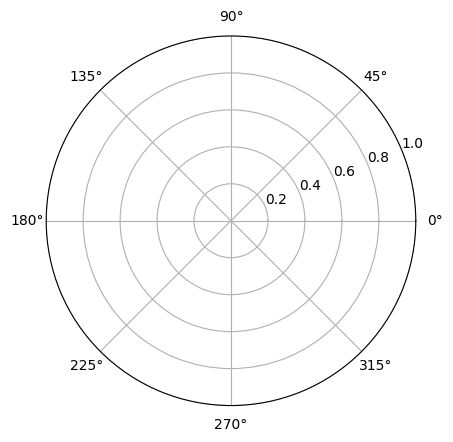

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Initialize plot with polar coordinates.
plt.subplot(111, polar=True);

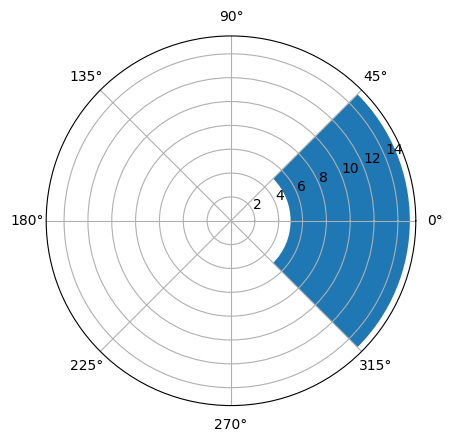

In [ ]:
# import numpy to get the value of Pi
import numpy as np

# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
plt.bar(x=0, height=10, width=np.pi/2, bottom=5);

#Data

In [ ]:
# import pandas for data wrangling
import pandas as pd

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
df.head(3)

,Name,Value
0,item 1,65
1,item 2,39
2,item 3,19


#Circular Barplot

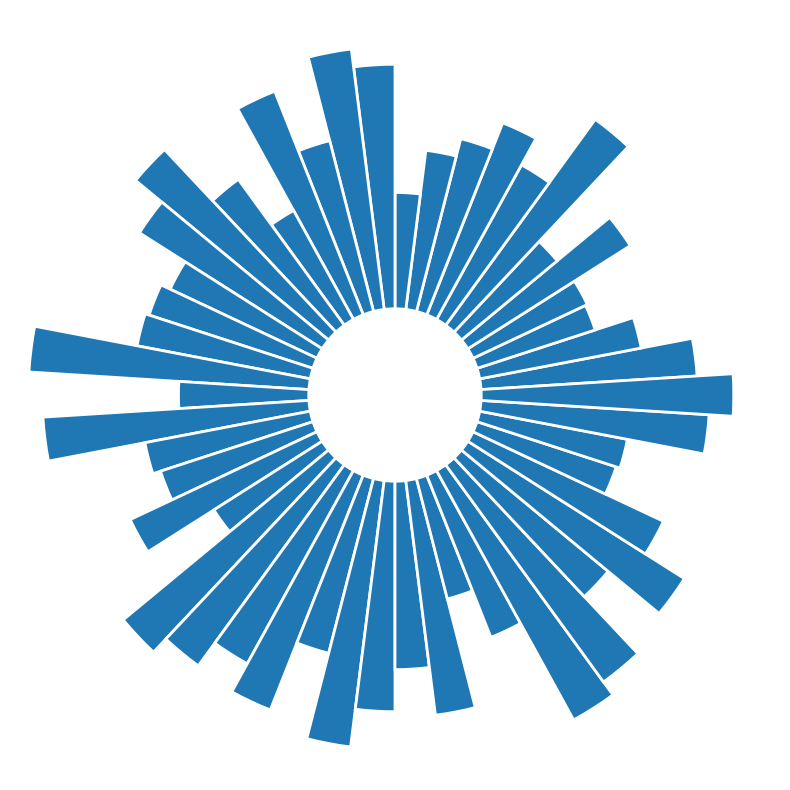

In [ ]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white")

#Add labels

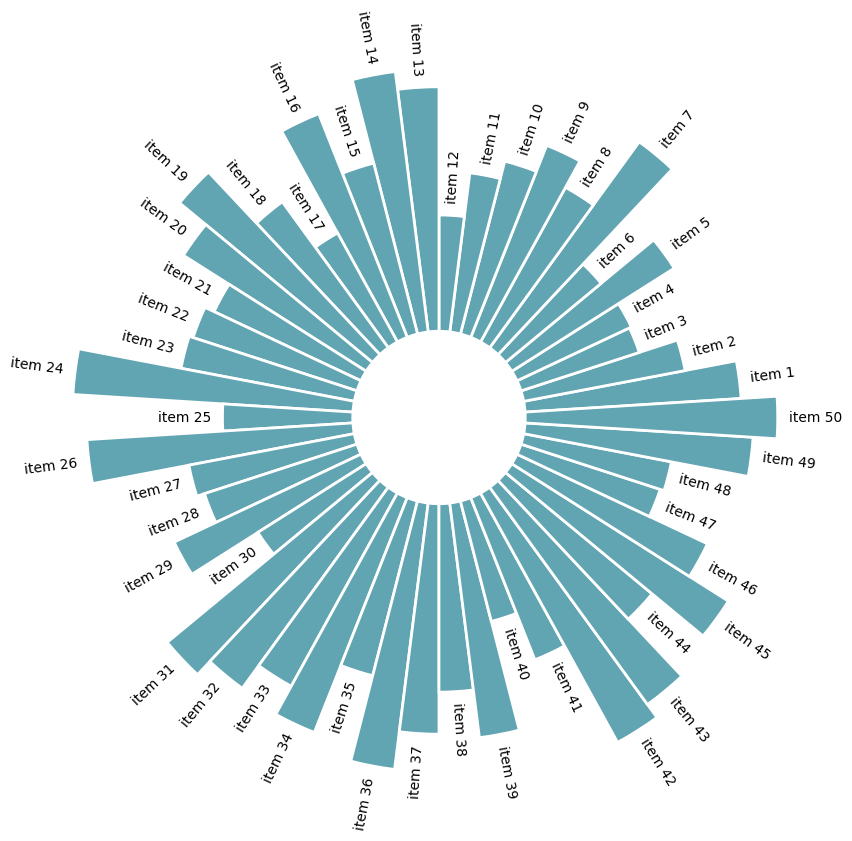

In [ ]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")


# Reordering

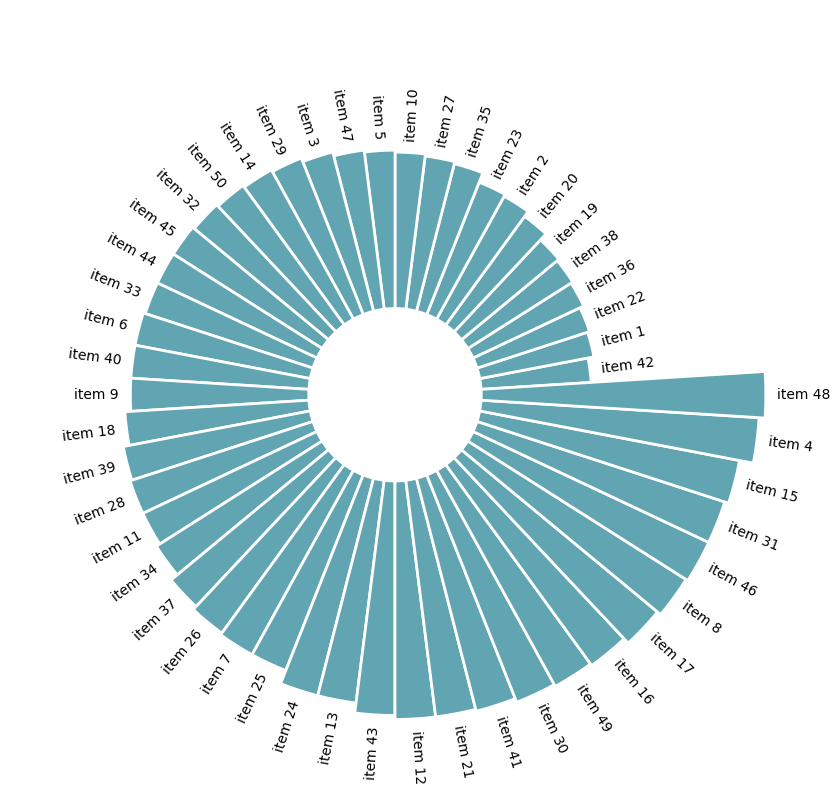

In [ ]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")

#Add a gap in the circle

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A


In [ ]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

In [ ]:
def add_labels(angles, values, labels, offset, ax):

    # This is the space between the end of the bar and the label
    padding = 4

    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle

        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

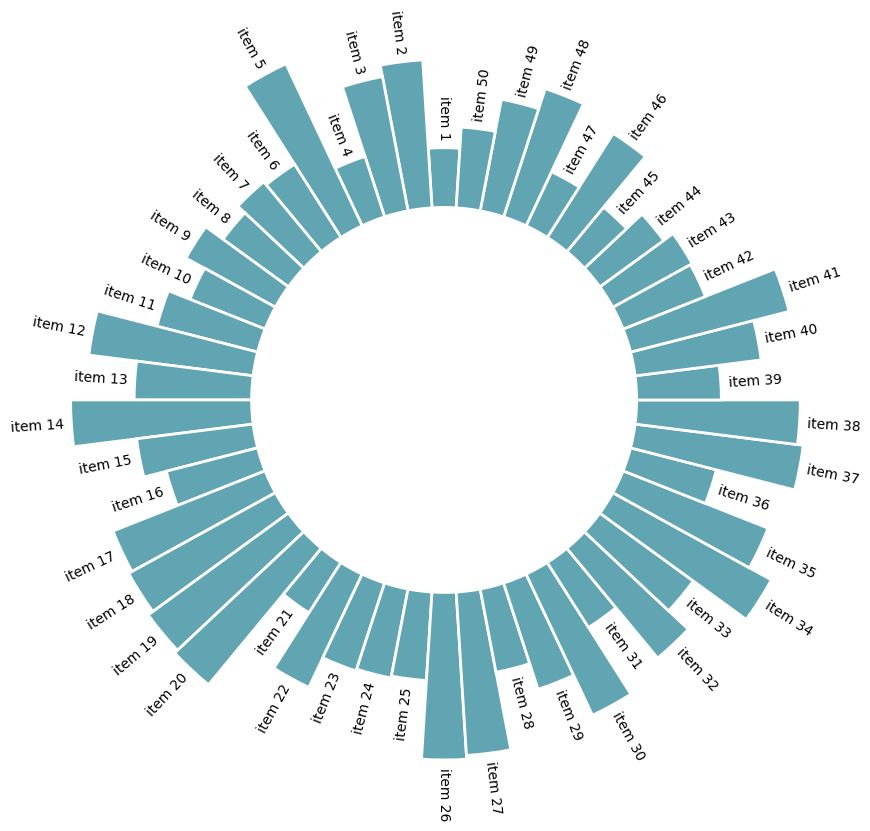

In [ ]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar.
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

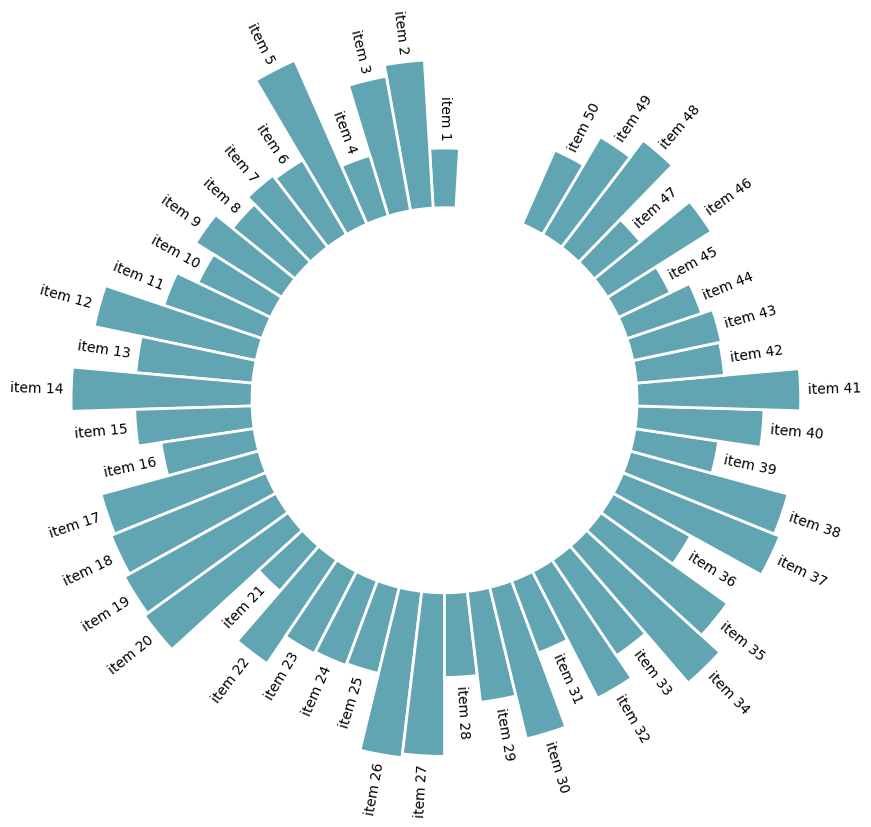

In [ ]:
# 3 empty bars are added
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# The layout customization is the same as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2",
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

#Space between groups

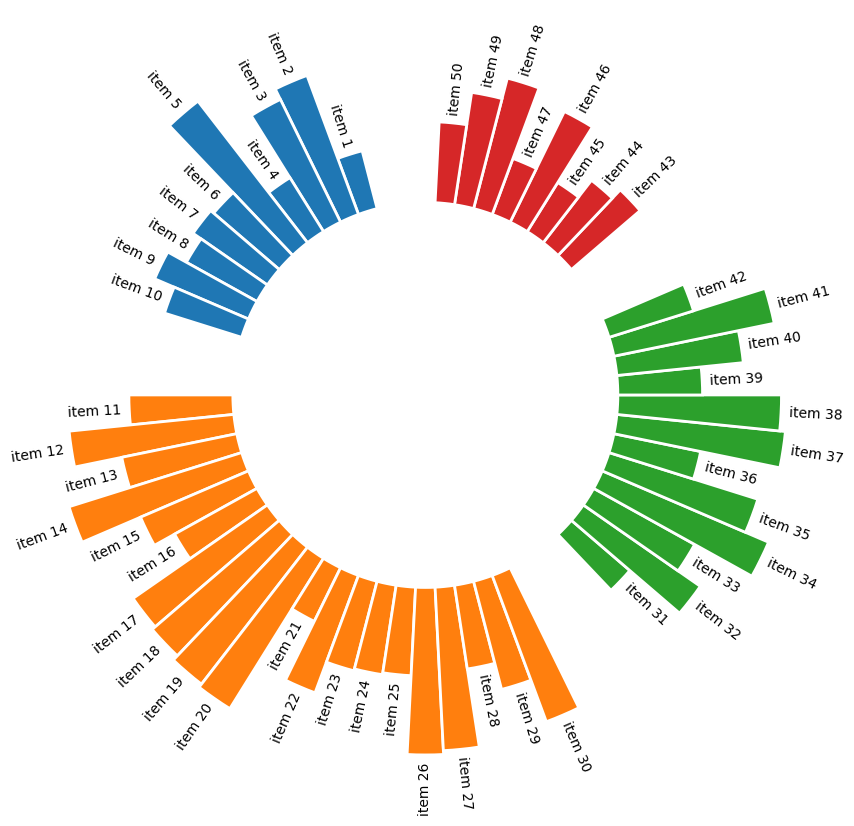

In [ ]:
# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars.
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

#Order bars

In [ ]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)


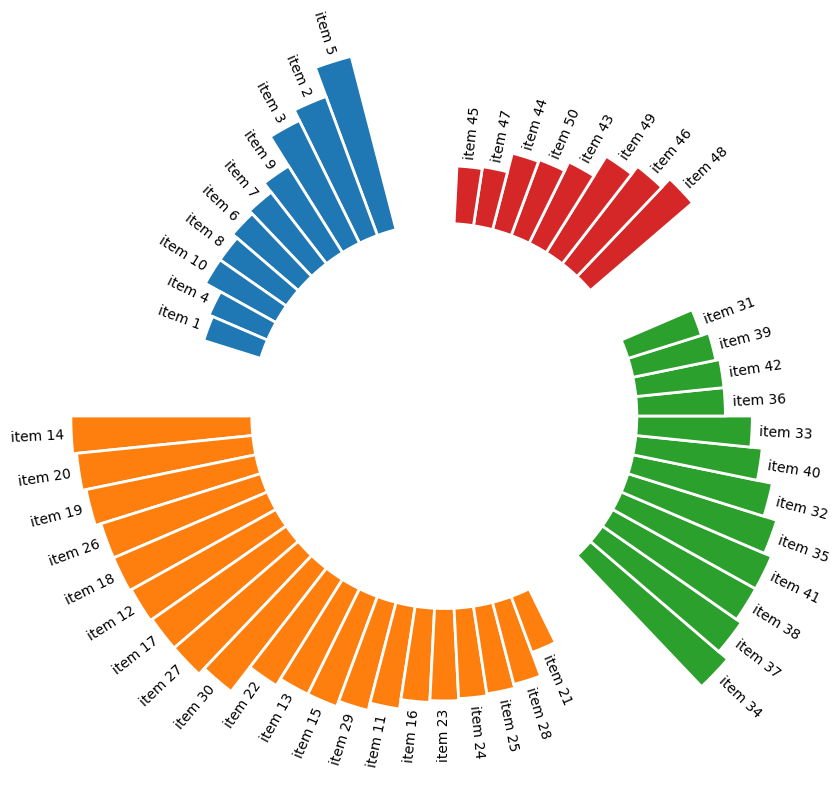

In [ ]:
VALUES = df_sorted["value"].values
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)


#Circular barchart customization

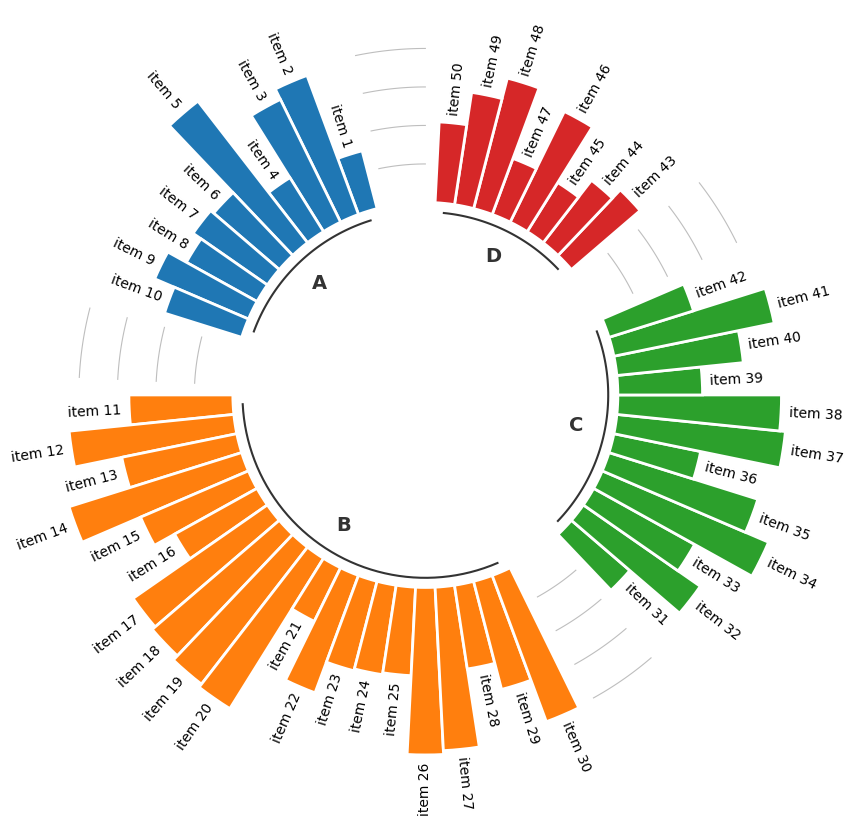

In [ ]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)

    offset += size + PAD

# Exe idioma inglês Brasil

## Git Configuração

In [ ]:
# Clonar o repositório
!git clone https://github.com/shuzoarthur/python_statistic_graphics.git

Cloning into 'python_statistic_graphics'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.80 MiB | 10.05 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
%cd python_statistic_graphics/

/content/python_statistic_graphics


## Gráfico

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Build a dataset
df = pd.read_csv('/content/python_statistic_graphics/data/Dificuldades_vivenciadas_ingles_brasil - Sheet1.csv')
df

,name,porcent,ranking
0,Falta recurso didático,0.81,Estrutura
1,Sem acesso livros didáticos,0.56,Estrutura
2,Livro muito avaçado alunos,0.42,Estrutura
3,Equipamento próprio,0.61,Estrutura
4,Acesso intenet sala de aula,0.25,Estrutura
5,Desvalorizaçao idioma,0.59,2º Idioma
6,Idioma não relevante alunos,0.41,2º Idioma
7,Inglês não faz parte realidade,0.33,2º Idioma
8,Ensino idioma não relevante escola,0.11,2º Idioma
9,Dificuldades planejamento,0.34,Planejamento


Def rotation angle

In [ ]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

Def add labels

In [ ]:
def add_labels(angles, values, labels, offset, ax):
    padding = 4
    for angle, value, label in zip(angles, values, labels):
        rotation, alignment = get_label_rotation(angle, offset)

        # Split label into two lines
        label = label.replace(" ", "\n")

        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

        # Add percentage value centered in the bar
        ax.text(
            x=angle,
            y=value / 2,
            s=f'{value:.0f}%',
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )


Basic circular barplot with labels

In [ ]:
df

,name,porcent,ranking
0,Falta recurso didático,0.81,Estrutura
1,Sem acesso livros didáticos,0.56,Estrutura
2,Livro muito avaçado alunos,0.42,Estrutura
3,Equipamento próprio,0.61,Estrutura
4,Acesso intenet sala de aula,0.25,Estrutura
5,Desvalorizaçao idioma,0.59,2º Idioma
6,Idioma não relevante alunos,0.41,2º Idioma
7,Inglês não faz parte realidade,0.33,2º Idioma
8,Ensino idioma não relevante escola,0.11,2º Idioma
9,Dificuldades planejamento,0.34,Planejamento


array([81., 56., 42., 61., 25., 59., 41., 33., 11., 34., 23., 18., 30.])

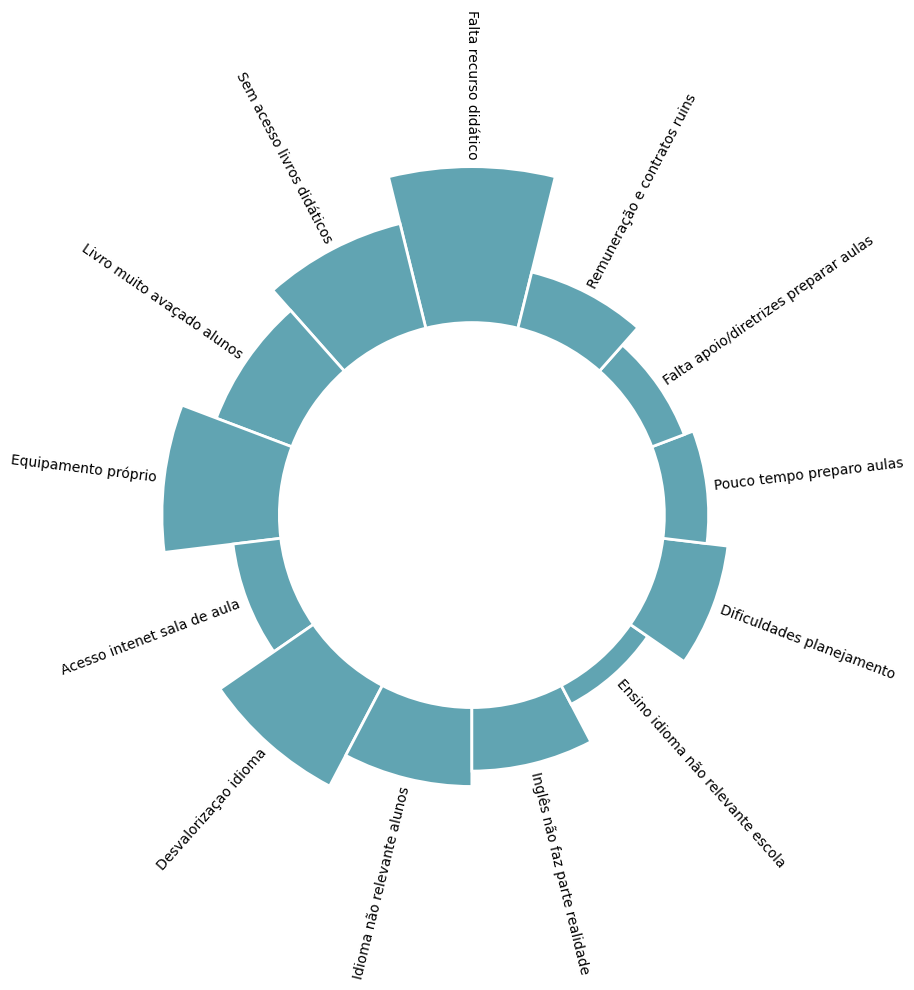

In [ ]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["porcent"].values*100
LABELS = df["name"].values

# Determine the width of each bar.
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

Space between groups

In [ ]:
df

,name,porcent,ranking
0,Falta recurso didático,0.81,Estrutura
1,Sem acesso livros didáticos,0.56,Estrutura
2,Livro muito avaçado alunos,0.42,Estrutura
3,Equipamento próprio,0.61,Estrutura
4,Acesso intenet sala de aula,0.25,Estrutura
5,Desvalorizaçao idioma,0.59,2º Idioma
6,Idioma não relevante alunos,0.41,2º Idioma
7,Inglês não faz parte realidade,0.33,2º Idioma
8,Ensino idioma não relevante escola,0.11,2º Idioma
9,Dificuldades planejamento,0.34,Planejamento


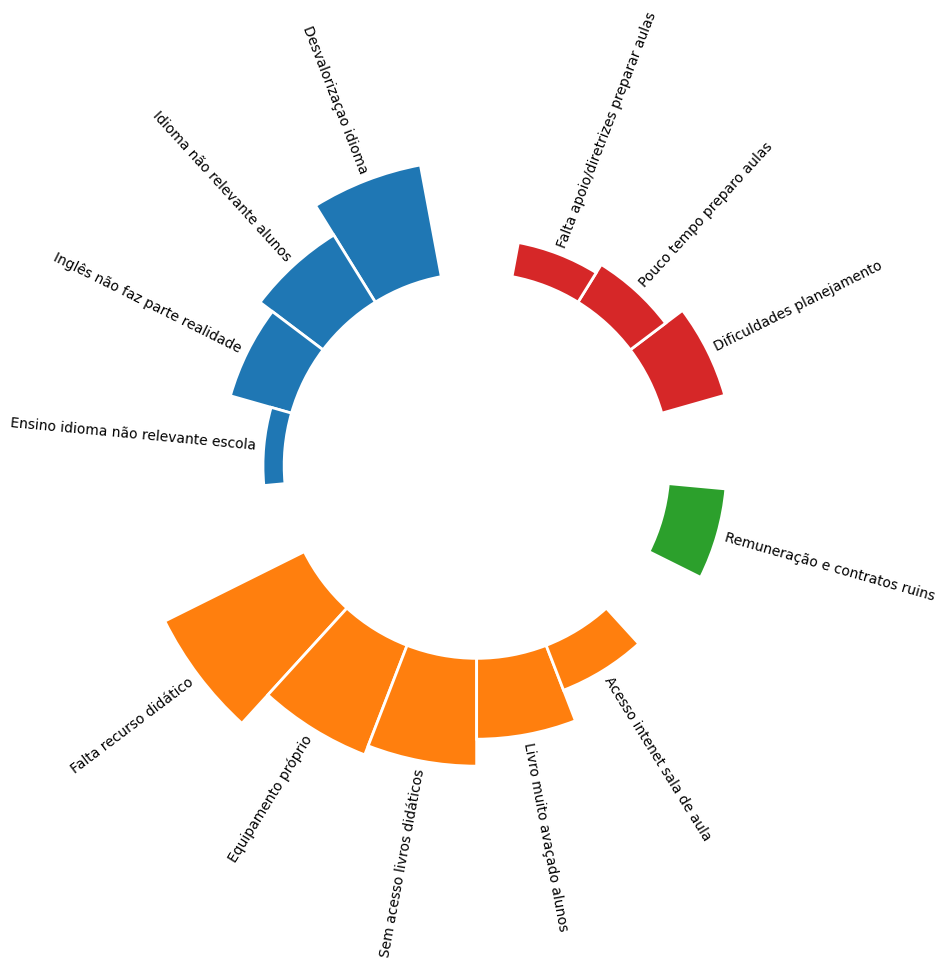

In [ ]:
# Grab the group values
GROUP = df["ranking"].values

# Add three empty bars to the end of each group
PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars.
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

Order bars

In [ ]:
df

,name,porcent,ranking
0,Falta recurso didático,0.81,Estrutura
1,Sem acesso livros didáticos,0.56,Estrutura
2,Livro muito avaçado alunos,0.42,Estrutura
3,Equipamento próprio,0.61,Estrutura
4,Acesso intenet sala de aula,0.25,Estrutura
5,Desvalorizaçao idioma,0.59,2º Idioma
6,Idioma não relevante alunos,0.41,2º Idioma
7,Inglês não faz parte realidade,0.33,2º Idioma
8,Ensino idioma não relevante escola,0.11,2º Idioma
9,Dificuldades planejamento,0.34,Planejamento


In [ ]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["ranking"])
    .apply(lambda x: x.sort_values(["porcent"], ascending = False))
    .reset_index(drop=True)
)

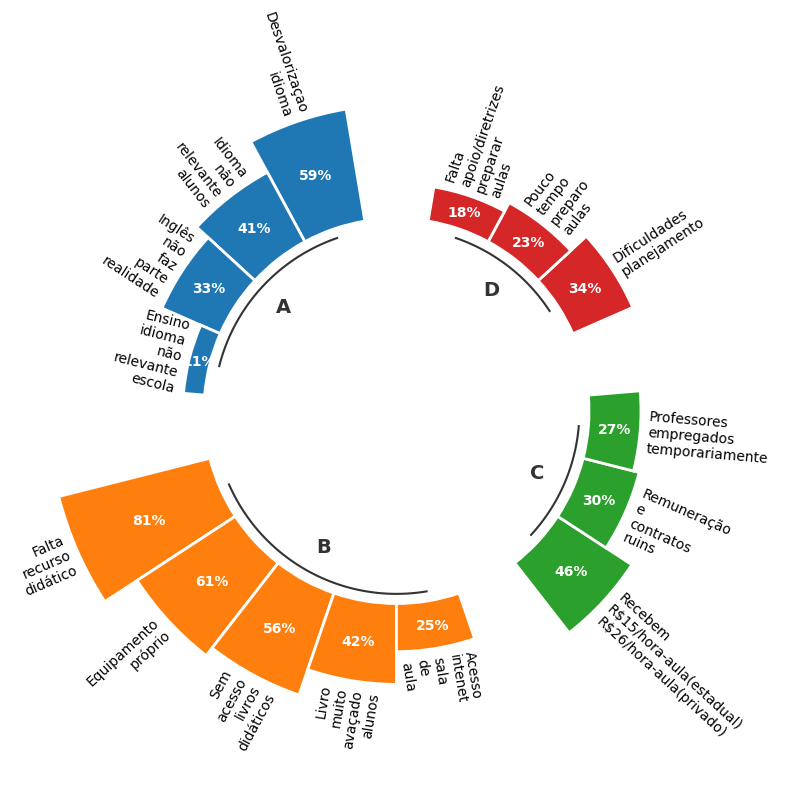

In [ ]:
VALUES = df_sorted["porcent"].values*100
LABELS = df_sorted["name"].values
GROUP = df_sorted["ranking"].values

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)

    offset += size + PAD

#Salvando o arquivo de saída
plt.savefig('ingles_barplot_circle.png', dpi=300, bbox_inches='tight')  # Exemplo para salvar com resolução de 300 DPI


# Estadiamento TNM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tabela (Construção)

In [2]:
patologia_estadio = pd.read_csv('/content/estadio_patologia_tabela_4.0.csv')
patologia_estadio = patologia_estadio.set_index('RGHC')
patologia_estadio = patologia_estadio.dropna(axis=0,how='all')

In [3]:
patologia_estadio.head()

,Unnamed: 0,t,n,m,pt,pn,pm
RGHC,,,,,,,
91472100G,0,NaN,NaN,NaN,T1C,N0,NaN
2991841D,1,NaN,NaN,NaN,T2,N0,NaN
91475304B,2,NaN,NaN,NaN,T2,N0,NaN
91490486G,3,NaN,NaN,NaN,NaN,NaN,NaN
91484524I,4,NaN,NaN,NaN,T1C,N1A,NaN


In [4]:
# Lista das colunas nas quais queremos aplicar a extração
colunas_para_extrair = ['t', 'n', 'm', 'pt', 'pn', 'pm']

# Função para extrair o primeiro número de um valor float
def extrair_primeiro_numero(valor):
    if pd.notna(valor):
        # Extrair o primeiro número da parte inteira
        return str(valor)[0:2]
    return np.nan

# Aplicar a função a todas as colunas do DataFrame
patologia_estadio[colunas_para_extrair] = patologia_estadio[colunas_para_extrair].applymap(extrair_primeiro_numero)

<ipython-input-4-67acb3fa628e>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  patologia_estadio[colunas_para_extrair] = patologia_estadio[colunas_para_extrair].applymap(extrair_primeiro_numero)


In [5]:
patologia_estadio.value_counts('m',normalize=True)

,proportion
m,
M0,0.535211
M1,0.422535
MX,0.042254


In [6]:
patologia_estadio.value_counts('pt',normalize=True)

,proportion
pt,
T2,0.395374
T1,0.328671
T3,0.154384
T4,0.059710
T0,0.059172
TX,0.002690


In [ ]:
patologia_estadio.value_counts('pn',normalize=True)

,proportion
pn,
N0,0.552985
N1,0.274879
N2,0.108123
N3,0.054868
NX,0.009145


In [ ]:
patologia_estadio.value_counts('pm',normalize=True)

,proportion
pm,
M0,0.714286
M1,0.285714


## Barplot table

In [7]:
df = pd.read_csv('/content/circular_barplot_table - Sheet1.csv')

In [ ]:
# Remove index row 11
df = df.drop(11)

In [ ]:
df

,value,porcent,ranking,class,nome
0,T2,0.395374,pT,patologia,T Patologia
1,T1,0.328671,pT,patologia,T Patologia
2,T3,0.154384,pT,patologia,T Patologia
3,T4,0.059710,pT,patologia,T Patologia
4,T0,0.059172,pT,patologia,T Patologia
5,TX,0.002690,pT,patologia,T Patologia
6,N0,0.552985,pN,patologia,N Patologia
7,N1,0.274879,pN,patologia,N Patologia
8,N2,0.108123,pN,patologia,N Patologia
9,N3,0.054868,pN,patologia,N Patologia


In [8]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

In [9]:
def add_labels(angles, values, labels, offset, ax):
    padding = 4
    for angle, value, label in zip(angles, values, labels):
        rotation, alignment = get_label_rotation(angle, offset)

        # Split label into two lines
        label = label.replace(" ", "\n")

        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

        # Add percentage value centered in the bar
        ax.text(
            x=angle,
            y=value / 2,
            s=f'{value:.0f}%',
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )

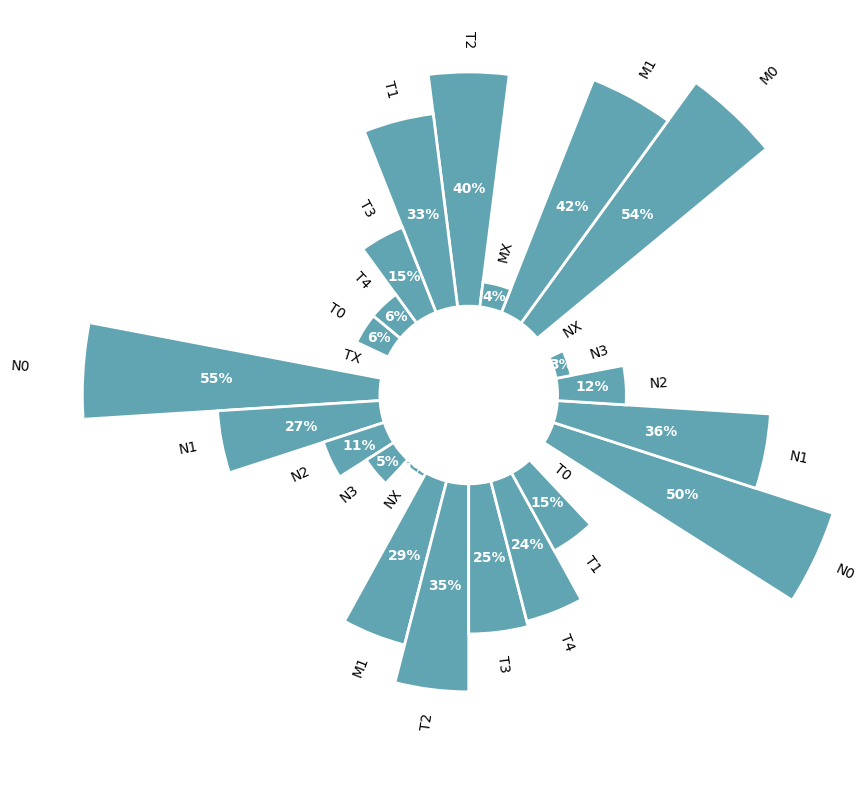

In [ ]:
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["porcent"].values*100
LABELS = df["value"].values

# Determine the width of each bar.
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-15, 50)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

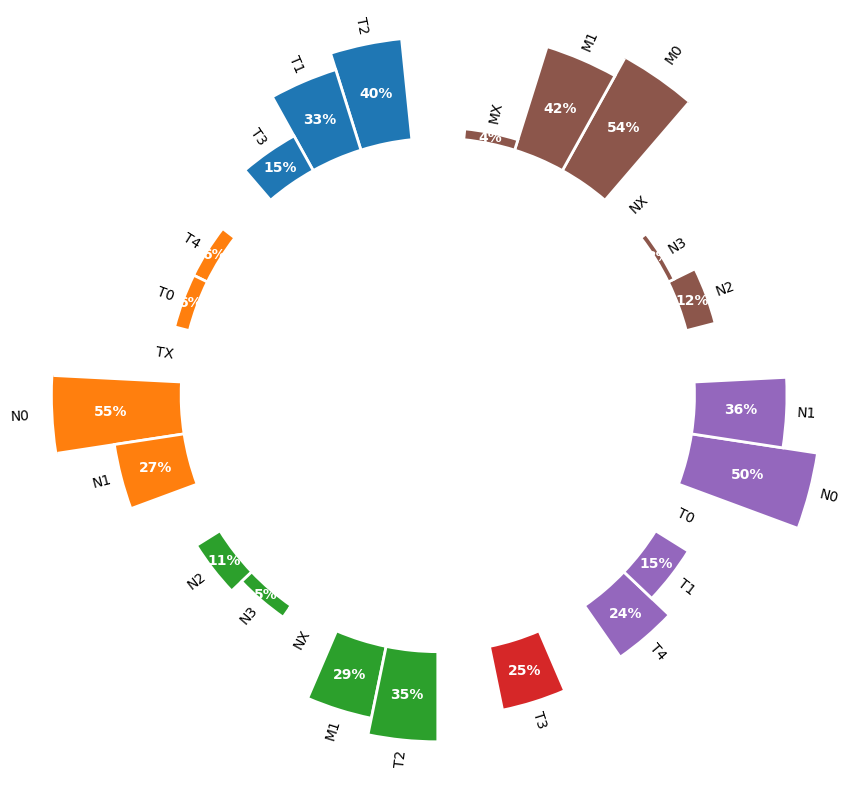

In [ ]:
# Grab the group values
GROUP = df["ranking"].values

# Add three empty bars to the end of each group
PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars.
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

In [10]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["ranking"])
    .apply(lambda x: x.sort_values(["porcent"], ascending = False))
    .reset_index(drop=True)
)

<ipython-input-10-7251a9040ceb>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(["porcent"], ascending = False))


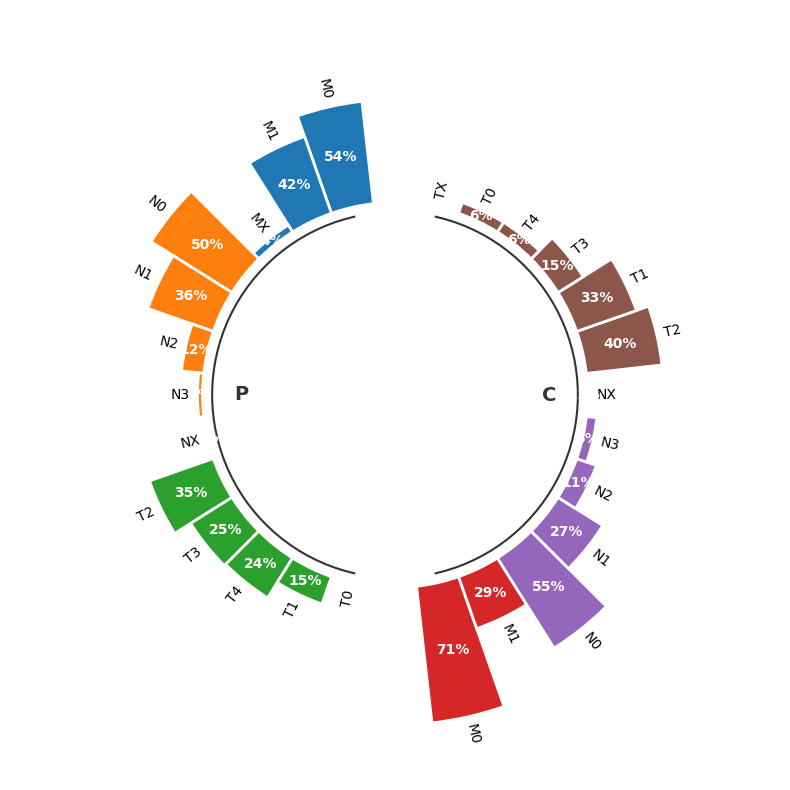

In [11]:
VALUES = df_sorted["porcent"].values*100
LABELS = df_sorted["value"].values
GROUP = df_sorted["class"].values

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("class")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZEE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZEE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["P", "C", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)

    offset += size + PAD

#Salvando o arquivo de saída
plt.savefig('ingles_barplot_circle.png', dpi=300, bbox_inches='tight')  # Exemplo para salvar com resolução de 300 DPI


In [12]:
def add_labels(angles, values, labels, offset, ax):
    padding = 1
    for angle, value, label in zip(angles, values, labels):
        rotation, alignment = get_label_rotation(angle, offset)

        # Split label into two lines
        label = label.replace(" ", "\n")

        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

        # Add percentage value centered in the bar
        ax.text(
            x=angle,
            y=value / 2,
            s=f'{value:.0f}%',
            ha="center",
            va="center",
            color="white",
            fontsize=10,
            fontweight="bold"
        )

In [13]:
df

,value,porcent,ranking,class,nome
0,T2,0.395374,pT,patologia,T Pathological
1,T1,0.328671,pT,patologia,T Pathological
2,T3,0.154384,pT,patologia,T Pathological
3,T4,0.059710,pT,patologia,T Pathological
4,T0,0.059172,pT,patologia,T Pathological
5,TX,0.002690,pT,patologia,T Pathological
6,N0,0.552985,pN,patologia,N Pathological
7,N1,0.274879,pN,patologia,N Pathological
8,N2,0.108123,pN,patologia,N Pathological
9,N3,0.054868,pN,patologia,N Pathological


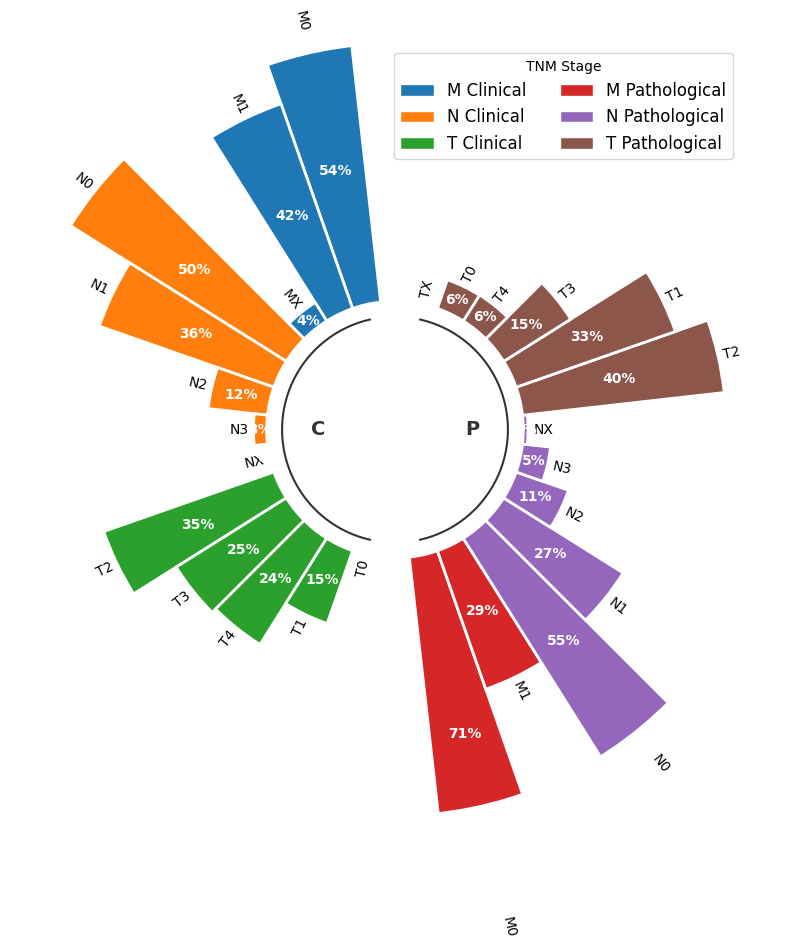

In [14]:
VALUES = df_sorted["porcent"].values*100
LABELS = df_sorted["value"].values
GROUP = df_sorted["class"].values

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("class")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

ax.set_theta_offset(OFFSET)
ax.set_ylim(-25, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZEE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZEE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# Create a legend based in the 'ax.bar' color


# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["C", "P"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD -1], num=50)
    ax.plot(x1, [-3] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -10, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    offset += size + PAD

from matplotlib.patches import Patch

# Obter os nomes únicos preservando a ordem de aparição
ranking_info = df_sorted.drop_duplicates('ranking')[['ranking', 'nome']]
ranking_labels = ranking_info['nome'].tolist()
ranking_colors = [f"C{i}" for i in range(len(ranking_labels))]

# Criar elementos de legenda
legend_elements = [
    Patch(facecolor=color, edgecolor='white', label=label)
    for color, label in zip(ranking_colors, ranking_labels)
]

# Adicionar a legenda ao gráfico
ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(0.95, 1),  # Ajuste vertical da posição
    ncol=2,
    frameon=True,
    fontsize=12,
    title="TNM Stage"
)


#Salvando o arquivo de saída
plt.savefig('estadiamento_barplot_circle.png', dpi=300, bbox_inches='tight')  # Exemplo para salvar com resolução de 300 DPI


<ipython-input-44-87aabca2e752>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(["porcent"], ascending=False))


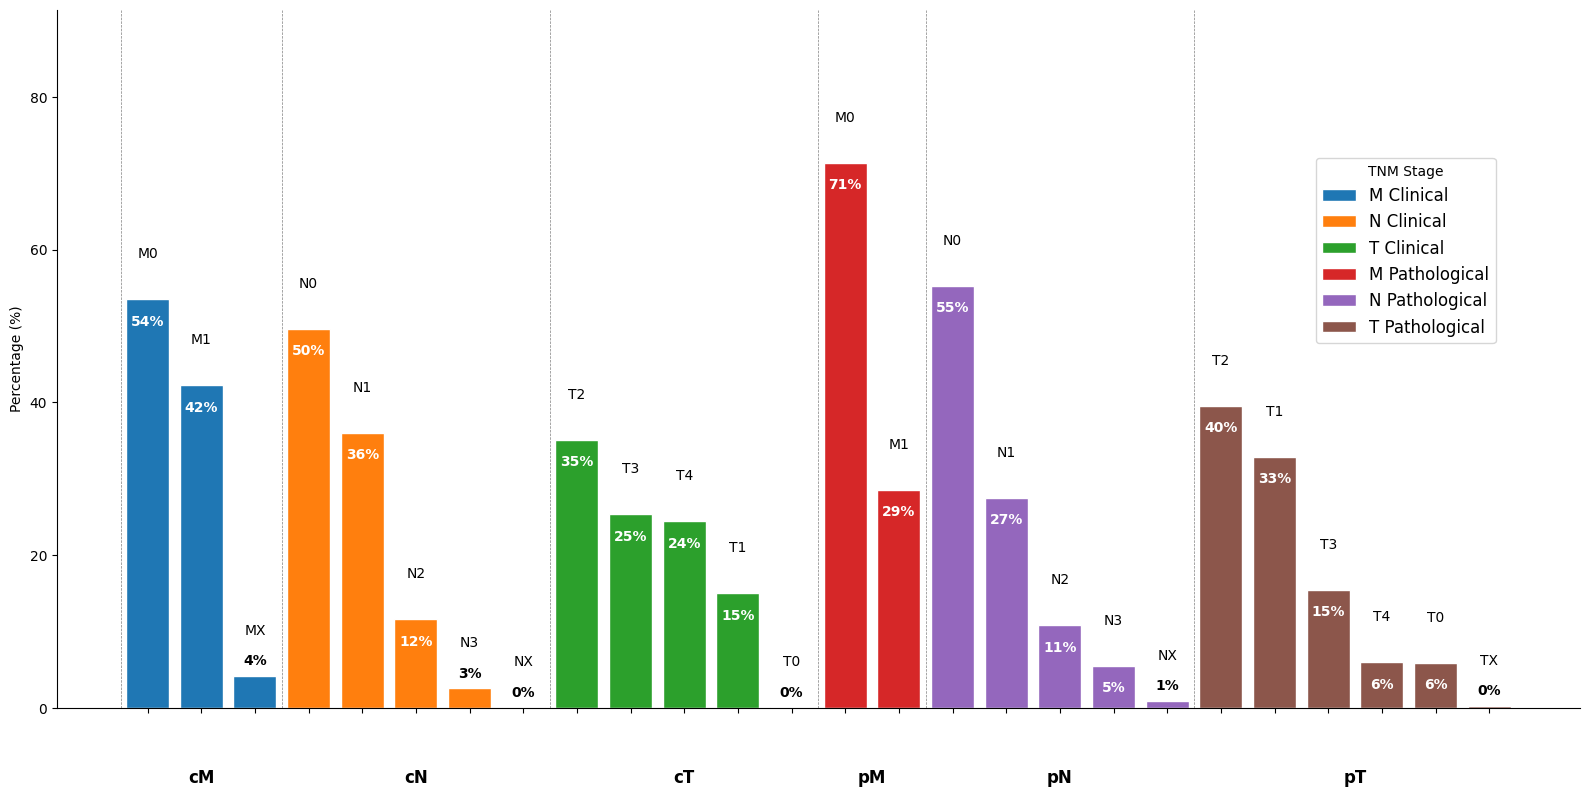

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Sort dataframe as before
df_sorted = (
    df
    .groupby(["ranking"])
    .apply(lambda x: x.sort_values(["porcent"], ascending=False))
    .reset_index(drop=True)
)

# Values and labels
VALUES = df_sorted["porcent"].values * 100
LABELS = df_sorted["value"].values
GROUP = df_sorted["class"].values

# Colors by group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Set bar positions
x_pos = np.arange(len(VALUES))

fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.bar(x_pos, VALUES, color=COLORS, edgecolor="white", width=0.8)

# Threshold for switching label position
label_threshold = 5

# Add value and name labels
for i, (value, label) in enumerate(zip(VALUES, LABELS)):
    if value >= label_threshold:
        # Label inside the bar
        ax.text(i, value - 2, f'{value:.0f}%', ha='center', va='top',
                color='white', fontweight='bold', fontsize=10)
    else:
        # Label above the bar
        ax.text(i, value + 1, f'{value:.0f}%', ha='center', va='bottom',
                color='black', fontweight='bold', fontsize=10)

    # Always show the label name above the percentage
    ax.text(i, value + 5, label, ha='center', va='bottom', fontsize=10)


# X-axis formatting
ax.set_xticks(x_pos)
ax.set_xticklabels([''] * len(x_pos))  # Hide default labels

# Group labels
group_offset = 0
for group, size in zip(df_sorted["ranking"].unique(), GROUPS_SIZE):
    center = group_offset + size / 2 - 0.5
    ax.text(center, -8, group, ha='center', va='top', fontweight='bold', fontsize=12)
    # Optional separator line
    ax.axvline(group_offset - 0.5, color='gray', linestyle='--', linewidth=0.5)
    group_offset += size

ax.set_ylabel("Percentage (%)")
ax.set_ylim(0, max(VALUES) + 20)

# Legend
ranking_info = df_sorted.drop_duplicates('ranking')[['ranking', 'nome']]
ranking_labels = ranking_info['nome'].tolist()
ranking_colors = [f"C{i}" for i in range(len(ranking_labels))]
legend_elements = [
    Patch(facecolor=color, edgecolor='white', label=label)
    for color, label in zip(ranking_colors, ranking_labels)
]

ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(0.95, 0.8),
    ncol=1,
    frameon=True,
    fontsize=12,
    title="TNM Stage"
)

# Clean up spines
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('estadiamento_barplot_vertical.png', dpi=300, bbox_inches='tight')


# Others plot

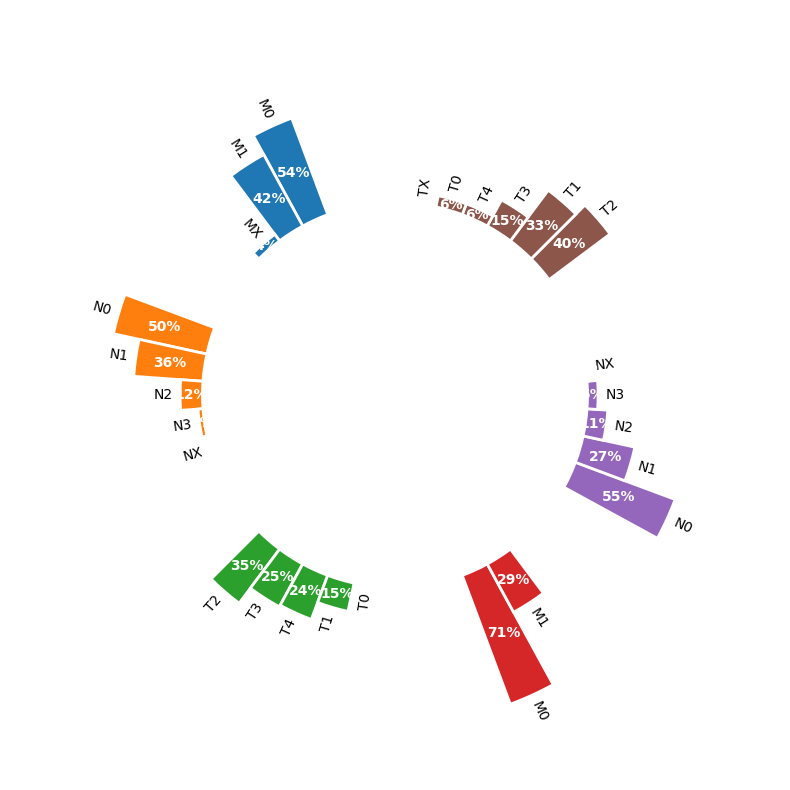

In [ ]:
VALUES = df_sorted["porcent"].values*100
LABELS = df_sorted["value"].values
GROUP = df_sorted["class"].values

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("class")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Determines where to place the first bar.
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

ax.set_theta_offset(OFFSET)
ax.set_ylim(-25, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZEE = [len(i[1]) for i in df.groupby("ranking")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZEE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# Create a legend based in the 'ax.bar' color


# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["C", "P"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD -1], num=50)
    ax.plot(x1, [-3] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -10, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    offset += size + PAD

from matplotlib.patches import Patch

# Obter os nomes únicos preservando a ordem de aparição
ranking_info = df_sorted.drop_duplicates('ranking')[['ranking', 'nome']]
ranking_labels = ranking_info['nome'].tolist()
ranking_colors = [f"C{i}" for i in range(len(ranking_labels))]

# Criar elementos de legenda
legend_elements = [
    Patch(facecolor=color, edgecolor='white', label=label)
    for color, label in zip(ranking_colors, ranking_labels)
]

# Adicionar a legenda ao gráfico
ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(0.95, 1),  # Ajuste vertical da posição
    ncol=2,
    frameon=True,
    fontsize=12,
    title="TNM Stage"
)


#Salvando o arquivo de saída
plt.savefig('estadiamento_barplot_circle.png', dpi=300, bbox_inches='tight')  # Exemplo para salvar com resolução de 300 DPI


<ipython-input-46-27648f8e21a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(barplot_table, x='porcent', y='class', inner='stick', palette='Dark2')


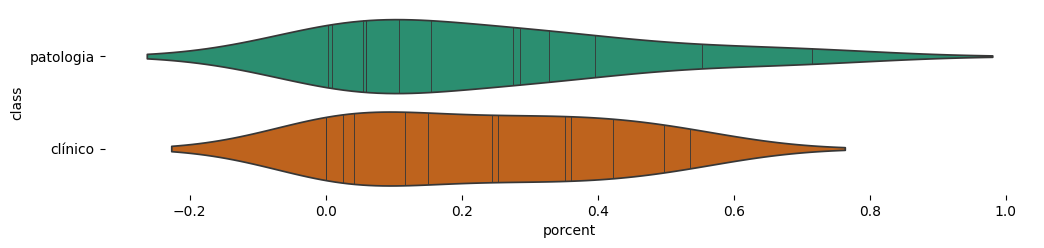

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(barplot_table['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(barplot_table, x='porcent', y='class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-45-cbf0e14a76d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(barplot_table, x='porcent', y='ranking', inner='stick', palette='Dark2')


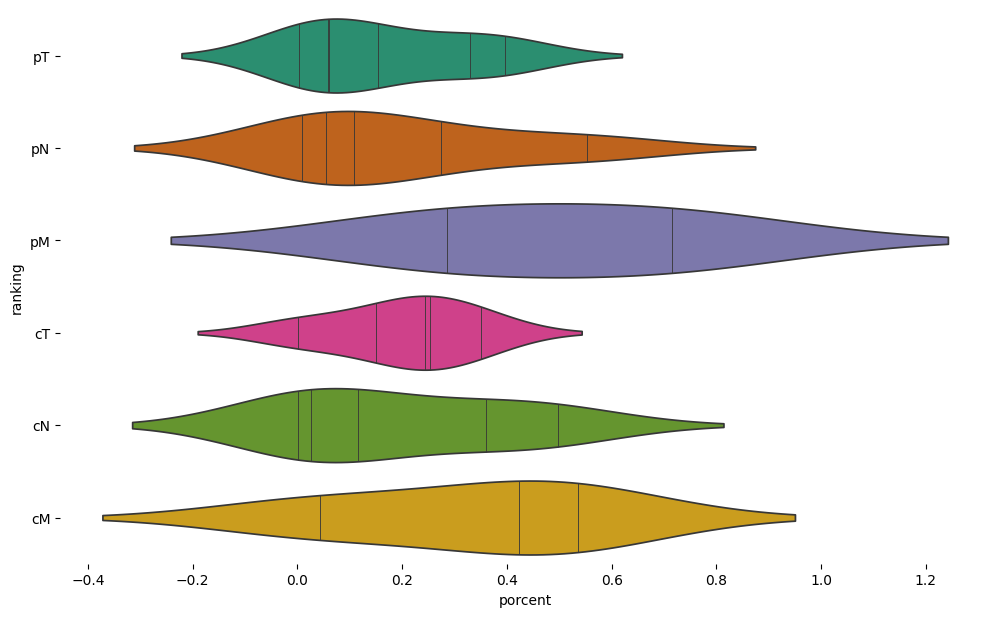

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(barplot_table['ranking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(barplot_table, x='porcent', y='ranking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)